<a href="https://colab.research.google.com/github/Tejas892001/Machine-learning/blob/main/digit_classification(using%20ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

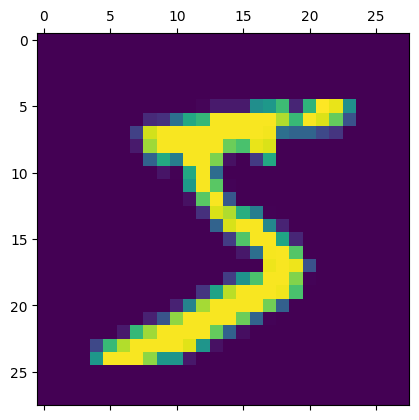

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [18]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [19]:
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9254


In [20]:
model1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9257


[0.266295850276947, 0.9257000088691711]

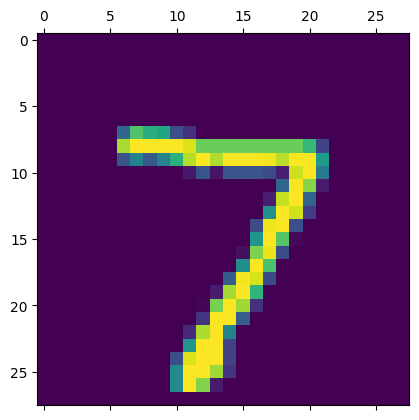

In [23]:
plt.matshow(X_test[0])

In [24]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[0]           #It gives probabilities for all 10 digits occurances
np.argmax(y_predicted[0])

313/313 [==============================] - 0s 1ms/step


7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  932,   14,    9,    3,   11,   10,   35,    4],
       [   4,    0,   20,  911,    0,   33,    2,   11,   23,    6],
       [   2,    1,    8,    2,  914,    0,    8,    4,   11,   32],
       [  11,    3,    4,   24,    7,  787,   14,    6,   30,    6],
       [  13,    3,   10,    1,    7,   11,  909,    2,    2,    0],
       [   1,    5,   22,    7,    7,    0,    0,  955,    3,   28],
       [   9,    7,    9,   20,    9,   27,    9,   12,  867,    5],
       [  11,    7,    1,   11,   34,    7,    0,   28,    5,  905]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

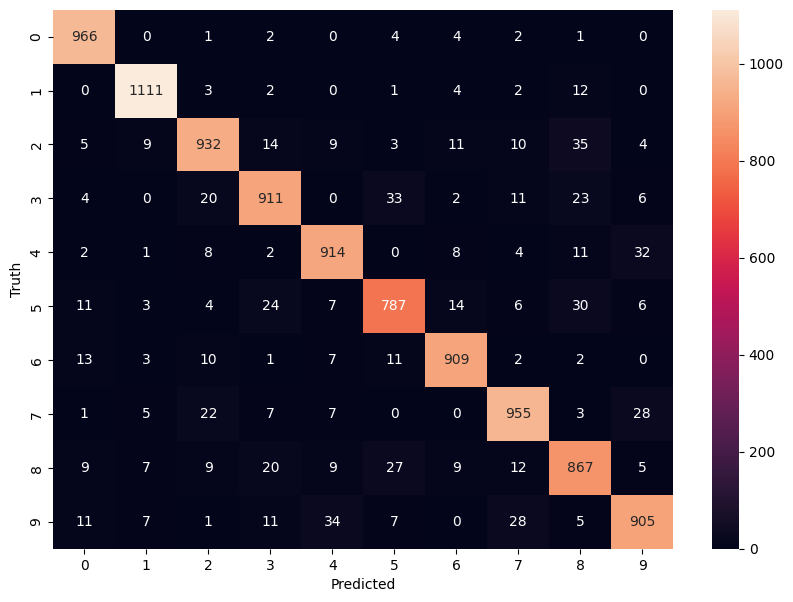

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2800 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1251 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9842


In [34]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9741


[0.08666431158781052, 0.9740999937057495]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

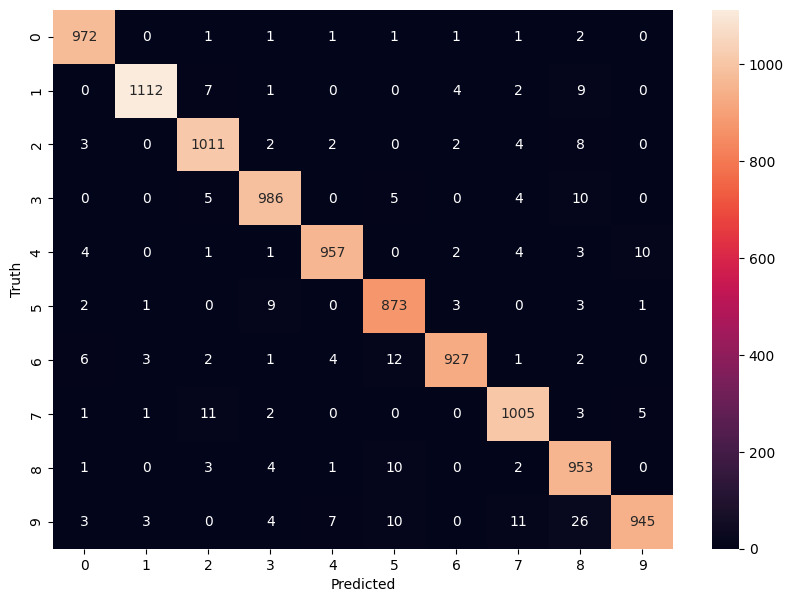

In [36]:
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')